### Importación de datos



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



###Ingreso total por cada tienda

In [15]:
lista_tiendas=[('Tienda 1',tienda),('Tienda 2',tienda2),('Tienda 3',tienda3),('Tienda 4',tienda4)]

#for n,t in lista_tiendas:
#  print(f'El ingreso total de {n} es: ${t['Precio'].sum()}')

lista_ingresos=[(nombre,float(df['Precio'].sum()))for nombre,df in lista_tiendas]

#print(lista_ingresos)

for (nombre,df),(nombre,ingreso) in zip(lista_tiendas,lista_ingresos):
    print(f'Ingreso total de {nombre}: ${ingreso}')



tienda_mayor_ingreso=max(lista_ingresos,key=lambda x:x[1])[0]
print(f'Tienda con mayor ingreso: {tienda_mayor_ingreso}')

tienda_menor_ingreso=min(lista_ingresos,key=lambda x:x[1])[0]
print(f'Tienda con menor ingreso: {tienda_menor_ingreso}')




Ingreso total de Tienda 1: $1150880400.0
Ingreso total de Tienda 2: $1116343500.0
Ingreso total de Tienda 3: $1098019600.0
Ingreso total de Tienda 4: $1038375700.0
Tienda con mayor ingreso: Tienda 1
Tienda con menor ingreso: Tienda 4


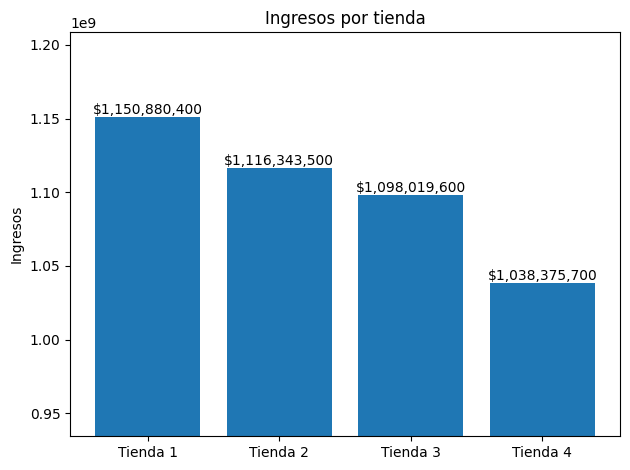

In [43]:
nombres = [nombre for nombre, ingreso in lista_ingresos]
ingresos = [ingreso for nombre, ingreso in lista_ingresos]

plt.bar(nombres,ingresos)
for i, valor in enumerate(ingresos):
    plt.text(i, valor, f'${valor:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Ingresos por tienda')
plt.ylabel('Ingresos')
# Ajustar los límites del eje y para resaltar las diferencias
min_ingreso = min(ingresos)
max_ingreso = max(ingresos)
plt.ylim(ymin=min_ingreso * 0.9, ymax=max_ingreso * 1.05) # Ajuste para "acercar" la vista
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

###Ventas por tienda

In [17]:
lista_categorias=[t.groupby('Categoría del Producto').size().reset_index(name='Cantidad de productos vendidos') for n,t in lista_tiendas]
tupla_categorias=[(f'Tienda {i+1}',lista_categorias[i]) for i in range(len(lista_categorias))]
tupla_categorias

for nombre,categoria in tupla_categorias:
  print(nombre)
  print(categoria)


Tienda 1
    Categoría del Producto  Cantidad de productos vendidos
0  Artículos para el hogar                             171
1     Deportes y diversión                             284
2        Electrodomésticos                             312
3             Electrónicos                             448
4   Instrumentos musicales                             182
5                 Juguetes                             324
6                   Libros                             173
7                  Muebles                             465
Tienda 2
    Categoría del Producto  Cantidad de productos vendidos
0  Artículos para el hogar                             181
1     Deportes y diversión                             275
2        Electrodomésticos                             305
3             Electrónicos                             422
4   Instrumentos musicales                             224
5                 Juguetes                             313
6                   Libros            

In [18]:
import matplotlib.pyplot as plt


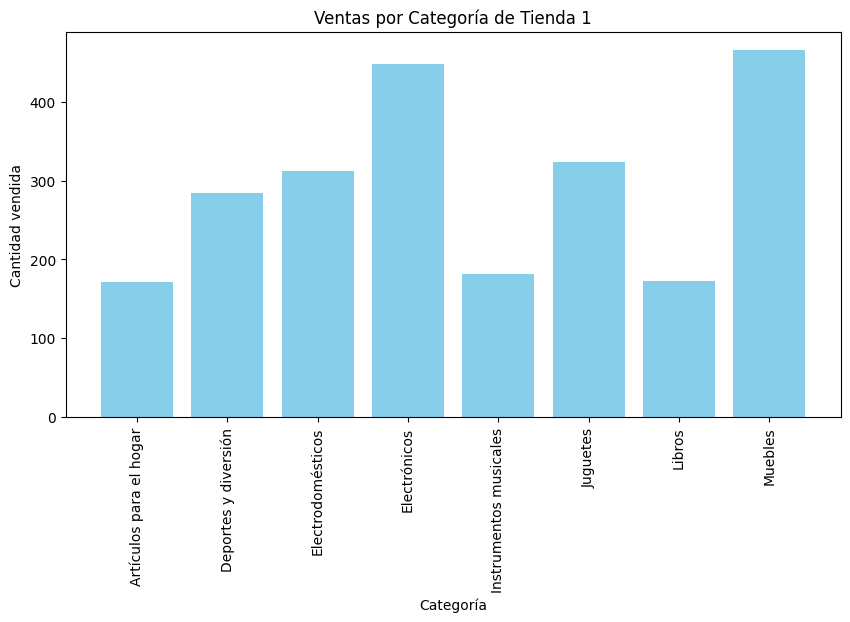

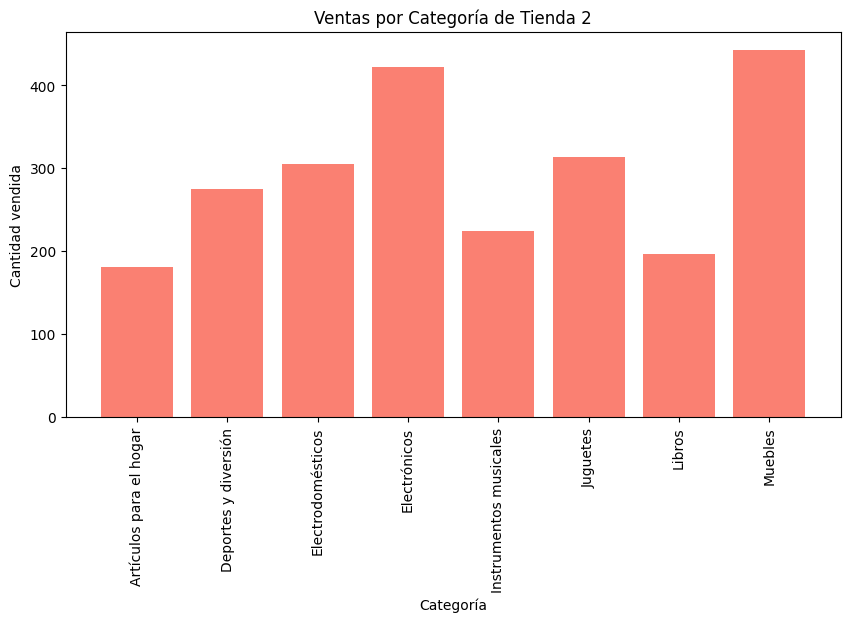

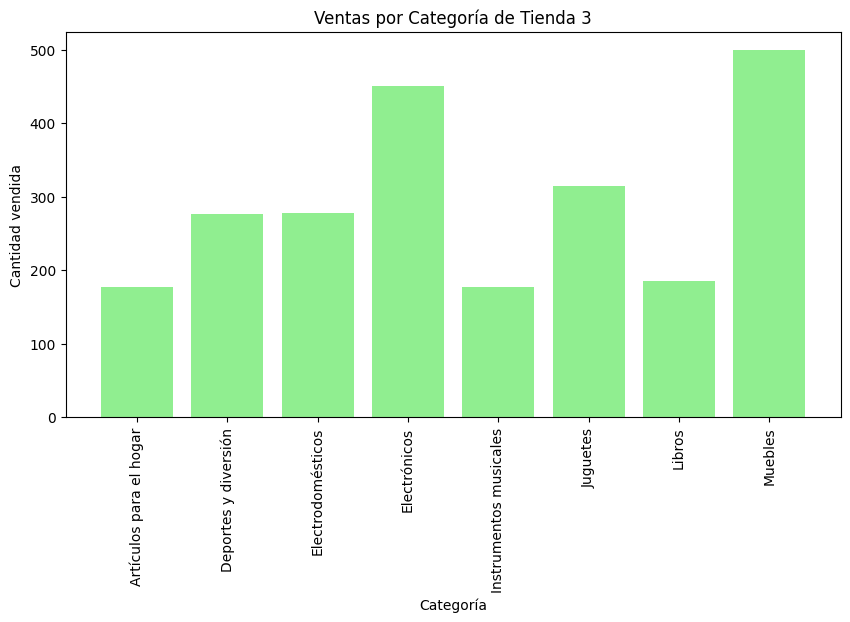

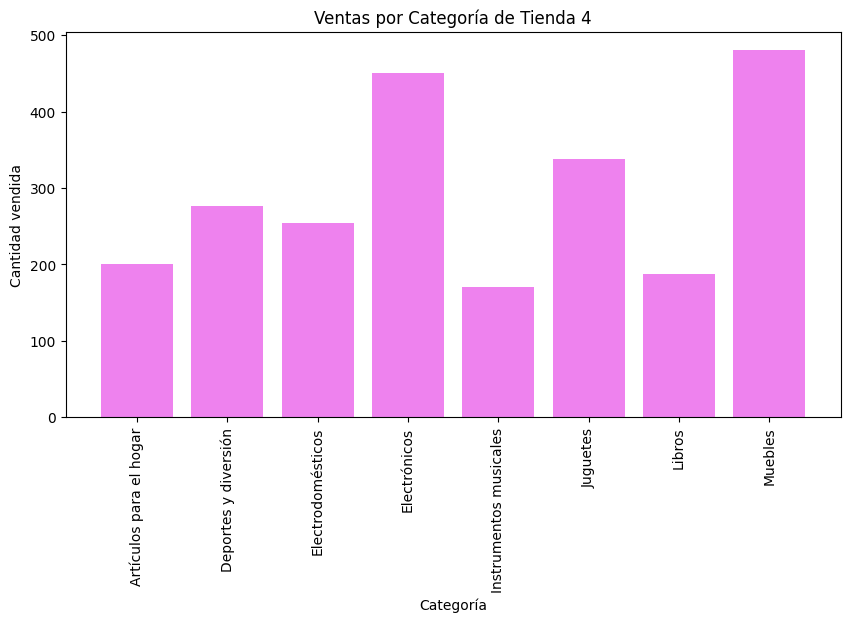

In [19]:
colores = ['skyblue', 'salmon', 'lightgreen', 'violet']

for (nombre,df),color in zip(tupla_categorias,colores):
  plt.figure(figsize=(10, 5))
  plt.bar(df['Categoría del Producto'],df['Cantidad de productos vendidos'], color=color)
  plt.xticks(rotation=90)
  plt.title(f'Ventas por Categoría de {nombre}')
  plt.xlabel('Categoría')
  plt.ylabel('Cantidad vendida')
  plt.show()

###Categoría con mayor venta

In [20]:
for nombre,categoria in tupla_categorias:
  fila_max=categoria.loc[categoria['Cantidad de productos vendidos'].idxmax()]
  print(f'En {nombre} se vendió más en {fila_max['Categoría del Producto']} con un total de ventas de : {fila_max['Cantidad de productos vendidos']}.')

En Tienda 1 se vendió más en Muebles con un total de ventas de : 465.
En Tienda 2 se vendió más en Muebles con un total de ventas de : 442.
En Tienda 3 se vendió más en Muebles con un total de ventas de : 499.
En Tienda 4 se vendió más en Muebles con un total de ventas de : 480.


# 3. Calificación promedio de la tienda


In [21]:
for nombre,tienda in lista_tiendas:
  print(f'La calificaión promedio de {nombre} es: {tienda['Calificación'].mean():.2f}')

La calificaión promedio de Tienda 1 es: 3.98
La calificaión promedio de Tienda 2 es: 4.04
La calificaión promedio de Tienda 3 es: 4.05
La calificaión promedio de Tienda 4 es: 4.00


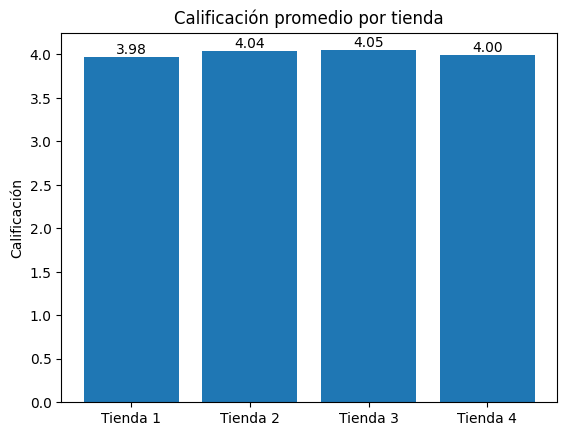

In [34]:
nombres = []
promedios = []

for nombre, tienda in lista_tiendas:
    nombres.append(nombre)
    promedios.append(tienda['Calificación'].mean())


plt.bar(nombres,promedios)
for i, valor in enumerate(promedios):
    plt.text(i, valor, f'{valor:,.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Calificación promedio por tienda')
plt.ylabel('Calificación')
plt.show()

# 4. Productos más y menos vendidos

###Ventas por producto

In [23]:
lista_productos=[(nombre,tienda.groupby('Producto').size().reset_index(name='Cantidad Vendida')) for nombre,tienda in lista_tiendas]
for nombre,producto in lista_productos:
  print(nombre)
  print(producto)

Tienda 1
                       Producto  Cantidad Vendida
0             Ajedrez de madera                49
1                       Armario                60
2             Asistente virtual                40
3                   Auriculares                50
4     Auriculares con micrófono                33
5           Balón de baloncesto                55
6             Balón de voleibol                42
7                       Batería                53
8                     Bicicleta                54
9       Bloques de construcción                56
10                     Cama box                44
11                    Cama king                44
12    Carrito de control remoto                52
13                 Celular ABXY                33
14  Ciencia de datos con Python                39
15                   Cubertería                52
16              Cubo mágico 8x8                44
17           Cuerda para saltar                40
18      Dashboards con Power BI          

###Productos más vendidos por cada tienda


In [24]:
lista_max=[(nombre,producto[producto['Cantidad Vendida']==producto['Cantidad Vendida'].max()])for nombre,producto in lista_productos]

for nombre,producto in lista_max:
  print(nombre)
  print()
  print(producto)
  print()

Tienda 1

         Producto  Cantidad Vendida
1         Armario                60
33     Microondas                60
48  TV LED UHD 4K                60

Tienda 2

                     Producto  Cantidad Vendida
24  Iniciando en programación                65

Tienda 3

         Producto  Cantidad Vendida
27  Kit de bancas                57

Tienda 4

    Producto  Cantidad Vendida
10  Cama box                62



###Productos menos vendidos por cada tienda


In [25]:
lista_min=[(nombre,producto[producto['Cantidad Vendida']==producto['Cantidad Vendida'].min()])for nombre,producto in lista_productos]

for nombre,producto in lista_min:
  print(nombre)
  print()
  print(producto)
  print()

Tienda 1

                     Producto  Cantidad Vendida
4   Auriculares con micrófono                33
13               Celular ABXY                33

Tienda 2

         Producto  Cantidad Vendida
26  Juego de mesa                32

Tienda 3

                  Producto  Cantidad Vendida
9  Bloques de construcción                35

Tienda 4

              Producto  Cantidad Vendida
22  Guitarra eléctrica                33



# 5. Envío promedio por tienda

In [26]:
lista_costos_prom=[(nombre,tienda['Costo de envío'].mean()) for nombre,tienda in lista_tiendas]

for nombre,costo in lista_costos_prom:
  print(f'El costo promedio de {nombre} es: ${costo:.2f}')

El costo promedio de Tienda 1 es: $26018.61
El costo promedio de Tienda 2 es: $25216.24
El costo promedio de Tienda 3 es: $24805.68
El costo promedio de Tienda 4 es: $23459.46


#INFORME FINAL

##Introducción

El objetivo del análisis presentado es determinar cuál es la tienda que le conviene al Sr. Juan vender en base a los siguientes aspectos:

1.Análisis de facturación
2.Ventas por categoría
3.Calificación promedio
4.Productos más o menos vendidos
5.Envío promedio por tienda




##Desarrollo del análisis

1.Análisis de facturación

A partir del análisis de los ingresos totales, se observa que la Tienda 1 es la que genera mayores ingresos, mientras que la Tienda 4 es la que obtiene la menor cifra. En el caso de la Tienda 2 y Tienda 3 presentan ingresos similares.

2.Ventas por categorías

En este análisis se puede concluir que en las cuatro tiendas la categoría que figura con mayor ventas es 'Muebles', y que el rango de variación de ventas no varía mucho para cada tienda.

3.Calificación promedio

El análisis de calificaciones arroja que las cuatro tiendas tienen promedios muy parecidos, cercanos a 4.0 sobre 5, lo que indica un nivel de satisfacción bastante uniforme.

Los valores aproximados fueron:

Tienda 1: 3.97

Tienda 2: 4.03

Tienda 3: 4.05

Tienda 4: 3.99

Aunque las diferencias no son grandes, Tienda 3 obtiene la mejor calificación promedio, lo cual puede ser un indicador de buena experiencia del cliente.

4.Productos más y menos vedidos
Los resultados de este análisis son los siguientes para cada tienda:

Tienda 1

Productos más vendidos:

- Armario (60)

- Microondas (60)

- TV LED UHD 4K (60)

Productos menos vendidos:

- Auriculares con micrófono  (33)       

- Celular ABXY (33)

Tienda 2

Producto más vendido:

- Iniciando en programación (65)

Producto menos vendido:

- Juego de mesa (32)       

Tienda 3

Producto más vendido:

-  Kit de bancas (57)

Producto menos vendido:

- Bloques de construcción (35)     

Tienda 4

Producto más vendido:

-  Cama box  (62)

Producto menos vendido:

- Guitarra eléctrica  (33)   




5.Envío promedio por tienda

Los costos de envío promedios variaron entre tiendas, pero todas mantienen valores similares.
Sin embargo, diferencias pequeñas en costos de operación pueden influir en el margen de ganancia.

Se puede observar que costo de envío mayor lo obtiene la Tienda 1 y el menor la Tienda 4.

##Conclusión

Con base en todos los análisis realizados —ingresos totales, categorías más vendidas, calificación promedio de los clientes y costos de envío— la tienda que el Sr. Juan debería poner en venta es la Tienda 4.

La Tienda 4 presenta el ingreso total más bajo entre todas las tiendas, lo que refleja un menor volumen de ventas y una rotación significativamente reducida. Además, la variedad de categorías vendidas y el rendimiento por producto son inferiores en comparación con las demás tiendas. Aunque su calificación promedio no es mala, tampoco destaca, y no compensa el bajo desempeño comercial. Finalmente, sus costos de envío no ofrecen una ventaja competitiva suficiente como para equilibrar sus debilidades operativas y de ventas.

Por estos motivos, la Tienda 4 representa la unidad menos rentable y de menor potencial de crecimiento, por lo que es la opción más adecuada para que el Sr. João venda y deje de operar